# Proyecto Final

## Grabador de Audio .WAP

In [7]:
import pyaudio
import wave

# Parametros
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
duracion = 10
archivo = "Audio.wav"

# pyaudio
audio = pyaudio.PyAudio()

# inicio gravacion
stream = audio.open(format=FORMAT, channels = CHANNELS,
                    rate = RATE, input = True,
                    frames_per_buffer = CHUNK)

print("grabando...")
frames = []

for i in range(0, int(RATE / CHUNK * duracion)):
    data = stream.read(CHUNK)
    frames.append(data)
print("grabación terminada")

# Fin gravacion
stream.stop_stream()
stream.close()
audio.terminate()

# Crea o reemplaza el archivo de audio
waveFile = wave.open(archivo, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

grabando...
grabación terminada


## Graficador

#### Para las graficas de Bajo, medio y alto, se debe modificar cutoff_frequency

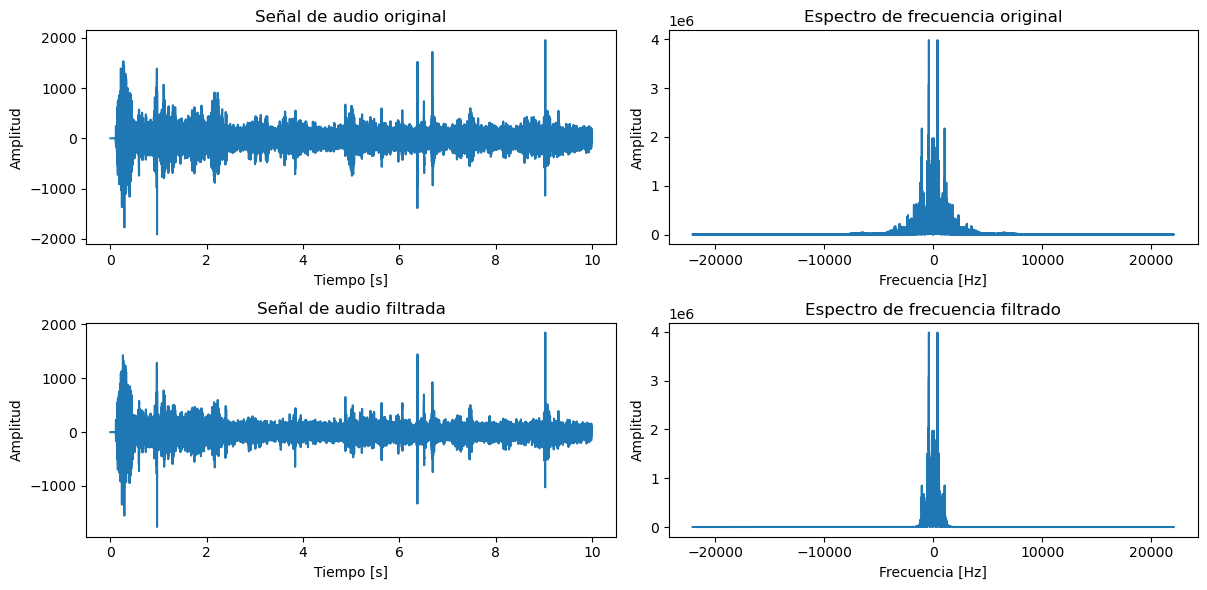

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq, ifft, fftshift

def butter_lowpass(cutoff, sample_rate, order=5):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, sample_rate, order=5):
    b, a = butter_lowpass(cutoff, sample_rate, order=order)
    y = filtfilt(b, a, data)
    return y

# Cargar el archivo de audio .wav
sample_rate, audio_signal = wavfile.read('Audio.wav')

# Tiempo
t = np.arange(len(audio_signal)) / float(sample_rate)

# Transformada de Fourier de la señal original
spectrum = np.abs(fftshift(fft(audio_signal)))
freqs = fftshift(fftfreq(len(audio_signal), 1/sample_rate))

# --- MODIFICAR --- #

# Filtrar la señal de audio
# Frecuencia de corte en Hz
cutoff_frequency = 1000  
#cutoff_frequency = 2000  
#cutoff_frequency = 3000  

# ------------------ #

filtered_signal = butter_lowpass_filter(audio_signal, cutoff_frequency, sample_rate)

# Transformada de Fourier de la señal filtrada
filtered_spectrum = np.abs(fftshift(fft(filtered_signal)))

def plot_audio_signals(t, audio_signal, freqs, spectrum, filtered_signal, filtered_spectrum):
    plt.figure(figsize = (18, 6))
    
    # Señal de audio original
    plt.subplot(2, 3, 1)
    plt.plot(t, audio_signal)
    plt.title("Señal de audio original")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    
    # Espectro de frecuencia de la señal original
    plt.subplot(2, 3, 2)
    plt.plot(freqs, spectrum)
    plt.title("Espectro de frecuencia original")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Amplitud")
    
    # Señal de audio filtrada
    plt.subplot(2, 3, 4)
    plt.plot(t, filtered_signal)
    plt.title("Señal de audio filtrada")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    
    # Espectro de frecuencia de la señal filtrada
    plt.subplot(2, 3, 5)
    plt.plot(freqs, filtered_spectrum)
    plt.title("Espectro de frecuencia filtrado")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Amplitud")

    plt.tight_layout()
    plt.show()

# Graficar señales y espectros
plot_audio_signals(t, audio_signal, freqs, spectrum, filtered_signal, filtered_spectrum)


## Convertidores finales

### Corte bajo

In [9]:
import librosa
import soundfile as sf
import numpy as np

# Rango de frecuencia (Hz)
frecuencia_corte_bajo = 1000

# seleccion archivo de Audio
archivo = 'Audio.wav'
sonido, muestreo = librosa.load(archivo, sr=None)

# Elimina ruidos de alta frecuencia 
sonido_filtrado = librosa.effects.preemphasis(sonido, coef=0.95)

# Guarda Archivo de Audio limpio
output_filename = "Audio_Final_corte_bajo.wav"
sf.write(output_filename, sonido_filtrado, muestreo)

### Corte medio 

In [10]:
import librosa
import soundfile as sf
import numpy as np

# Rango de frecuencia (Hz)
frecuencia_corte_medio = 2000

# seleccion archivo de Audio
archivo = 'Audio.wav'
sonido, muestreo = librosa.load(archivo, sr=None)

# Elimina ruidos de alta frecuencia 
sonido_filtrado = librosa.effects.preemphasis(sonido, coef=0.95)

# Guarda Archivo de Audio limpio
output_filename = "Audio_Final_corte_medio.wav"
sf.write(output_filename, sonido_filtrado, muestreo)

### Pasa medios

In [11]:
import librosa
import soundfile as sf
import numpy as np
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Rango de frecuencia (Hz)
lowcut = 1000
highcut = 3000

# seleccion archivo de Audio
archivo = 'Audio.wav'
sonido, muestreo = librosa.load(archivo, sr=None)

# Aplica filtro de paso de banda
sonido_filtrado = bandpass_filter(sonido, lowcut, highcut, muestreo, order=5)

# Guarda archivo de audio limpio
output_filename = "Audio_Final_pasa_medios.wav"
sf.write(output_filename, sonido_filtrado, muestreo)

### Corte alto

In [13]:
import librosa
import soundfile as sf
import numpy as np

# Rango de frecuencia (Hz)
frecuencia_corte_alto = 3000  

# seleccion archivo de Audio
archivo = 'Audio.wav'
sonido, muestreo = librosa.load(archivo, sr=None)

# Elimina ruidos de alta frecuencia 
sonido_filtrado = librosa.effects.preemphasis(sonido, coef=0.95)

# Guarda Archivo de Audio limpio
output_filename = "Audio_Final_corte_alto.wav"
sf.write(output_filename, sonido_filtrado, muestreo)